In [5]:
import pandas as pd
import numpy as np

## Definition

In [6]:
# Daily Sales Price/lb: mean = 3.65, sigma = 0.2
# Demand:
# 0: 0.02
# 1000: 0.03
# 2000: 0.05
# 3000: 0.08
# 4000: 0.33
# 5000: 0.29
# 6000: 0.20

# Daily Earning: SalesPrice * min(3500, Demand) - 10000

## Setting Parameteres

In [17]:
n = 200
SalesPriceMean = 3.65
SalesPriceStd = 0.2
DailyOpCost = 10000
BoatCapacity = 3500

## Define Demand Mapping as Discrete Random Variable

In [18]:
def demandMap(x):
    if (x > 0.0) & (x <= 0.02):
        return 0.0
    elif (x > 0.02) & (x <= 0.05):
        return 1000.0
    elif (x > 0.05) & (x <= 0.1):
        return 2000.0
    elif (x > 0.1) & (x <= 0.18):
        return 3000.0
    elif (x > 0.18) & (x <= 0.51):
        return 4000.0
    elif (x > 0.51) & (x <= 0.8):
        return 5000.0
    else:
        return 6000.0

## Generate Random Numbers as Demand, Sales Price, and Quantity Sold

In [19]:
Demand = pd.Series(np.random.uniform(0, 1, n)).apply(demandMap)
SalesPrices = pd.Series(np.random.normal(SalesPriceMean, SalesPriceStd, n))
QuantitySold = Demand.apply(lambda x: min(x, BoatCapacity))

Simulation = pd.DataFrame({
    'Demand': Demand,
    'SalesPrice': SalesPrices,
    'QuantitySold': QuantitySold
})

## Calculate Daily Earnings

In [20]:
DailyEarnings = Simulation.apply(lambda x: x.SalesPrice * x.QuantitySold - DailyOpCost, axis=1)

## 1. Shape of Daily Earnings

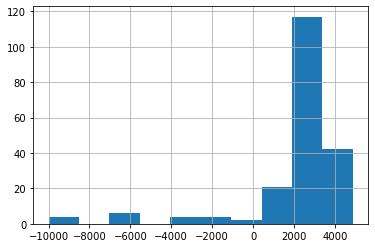

In [21]:
DailyEarnings.hist()

## 2. P(F > $1375)

In [22]:
(DailyEarnings > 1375).sum() / n

0.86

## 3. P(F < $0)

In [23]:
(DailyEarnings < 0).sum() / n

0.09

## 4. Expected Daily Earnings

In [24]:
DailyEarnings.mean()

2056.5378807835978

## 5. Variability of Daily Earnings

In [25]:
DailyEarnings.var() ** 0.5

2666.408061678025